In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr
import pingouin as pg
from scipy.signal import welch
from collections import Counter
# import ptitprince as pt

import importlib
import function
importlib.reload(function)
from function import *

# load data (rating, hmm, and clinical score)
+ rating sampling rate: 40Hz

In [5]:
df_rating_pred_conf=pd.read_pickle('../data/dataset/D1D2_downsampledata.pkl')
df_hmm=pd.read_pickle('../data/part_score_sharon/result.pkl')
df_BPI_START = pd.read_csv('../data/questionnaire/questionnaire_BPI_START_new_add_dup.csv')
df_PCS_GAD_PHQ=pd.read_csv('../data/questionnaire/questionnaire_PCS_GAD7_PHQ9.csv')
df_MSK=pd.read_csv('../data/questionnaire/qualtrics_05_excludeother_score.csv')

# Summary of findings

+ Variability of pain ratings and its relation to pain severity:
    + CV: correlates with pain mean
    + Fano factor correlate with the mean?
    + IQR?
    + FFT/power spectrum (either descriptive or also correlations if sig)
    + Test-retest: which of these measures are stable at day 2 (using standard reliability statistics)
    + Validation and generalisation: Carl's dataset possibly
    
+ Prediction: fairly accurate prediction, correlating with mean pain and CV on day 2 
    + people can predict their pain on following day

- Temporal structure:
    - HMM day 1: n states correlates with confidence

In [6]:
participant_list=[] # for rating and prediction
participant_list_Day1Day2rating=[] # for test and retest
print("total participants: "+str(len(df_rating_pred_conf)))
for index,row in df_rating_pred_conf.iterrows():
    if row.D2_rating!=[] and row.D1_prediction!=-1:
        partcipant=pain_rating_D1D2(row.PID)
        partcipant.insert_rating_time_D1(row.D1_rating,row.D1_time)
        partcipant.insert_rating_time_D2(row.D2_rating,row.D2_time)
        partcipant.update_prediction_confidence_D1(row.D1_prediction,row.D1_confidence)
        participant_list.append(partcipant)
    if row.D2_rating!=[]:
        partcipant=pain_rating_D1D2(row.PID)
        partcipant.insert_rating_time_D1(row.D1_rating,row.D1_time)
        partcipant.insert_rating_time_D2(row.D2_rating,row.D2_time)
        participant_list_Day1Day2rating.append(partcipant)
print(len(participant_list))

total participants: 81
41


In [7]:
mean_Day1_list=[part.mean_rating(1) for part in participant_list_Day1Day2rating]
mean_Day2_list=[part.mean_rating(2) for part in participant_list_Day1Day2rating]
std_Day1_list=[part.std(1) for part in participant_list_Day1Day2rating]
std_Day2_list=[part.std(2) for part in participant_list_Day1Day2rating]
cv_Day1_list=[part.cv(1) for part in participant_list_Day1Day2rating]
cv_Day2_list=[part.cv(2) for part in participant_list_Day1Day2rating]
fano_Day1_list=[part.fanofactor(1) for part in participant_list_Day1Day2rating]
fano_Day2_list=[part.fanofactor(2) for part in participant_list_Day1Day2rating]
iqr_Day1_list=[part.IQR(1) for part in participant_list_Day1Day2rating]
iqr_Day2_list=[part.IQR(2) for part in participant_list_Day1Day2rating]
frePSD_Day1_list=[part.power_spectrum(1,40)[1] for part in participant_list_Day1Day2rating]
frePSD_Day2_list=[part.power_spectrum(2,40)[1] for part in participant_list_Day1Day2rating]

In [8]:
mean_Day1_log_list=[np.log(part.mean_rating(1)) for part in participant_list_Day1Day2rating]
mean_Day2_log_list=[np.log(part.mean_rating(2)) for part in participant_list_Day1Day2rating]
# std_Day1_log_list=[part.std(1) for part in participant_list_Day1Day2rating]
# std_Day2_log_list=[part.std(2) for part in participant_list_Day1Day2rating]
cv_Day1_log_list=[np.log(part.cv(1)) for part in participant_list_Day1Day2rating]
cv_Day2_log_list=[np.log(part.cv(2)) for part in participant_list_Day1Day2rating]
# fano_Day1_log_list=[part.fanofactor(1) for part in participant_list_Day1Day2rating]
# fano_Day2_log_list=[part.fanofactor(2) for part in participant_list_Day1Day2rating]
iqr_Day1_log_list=[np.log(part.IQR(1)) for part in participant_list_Day1Day2rating]
iqr_Day2_log_list=[np.log(part.IQR(2)) for part in participant_list_Day1Day2rating]
# frePSD_Day1_log_list=[part.power_spectrum(1,40)[1] for part in participant_list_Day1Day2rating]
# frePSD_Day2_log_list=[part.power_spectrum(2,40)[1] for part in participant_list_Day1Day2rating]

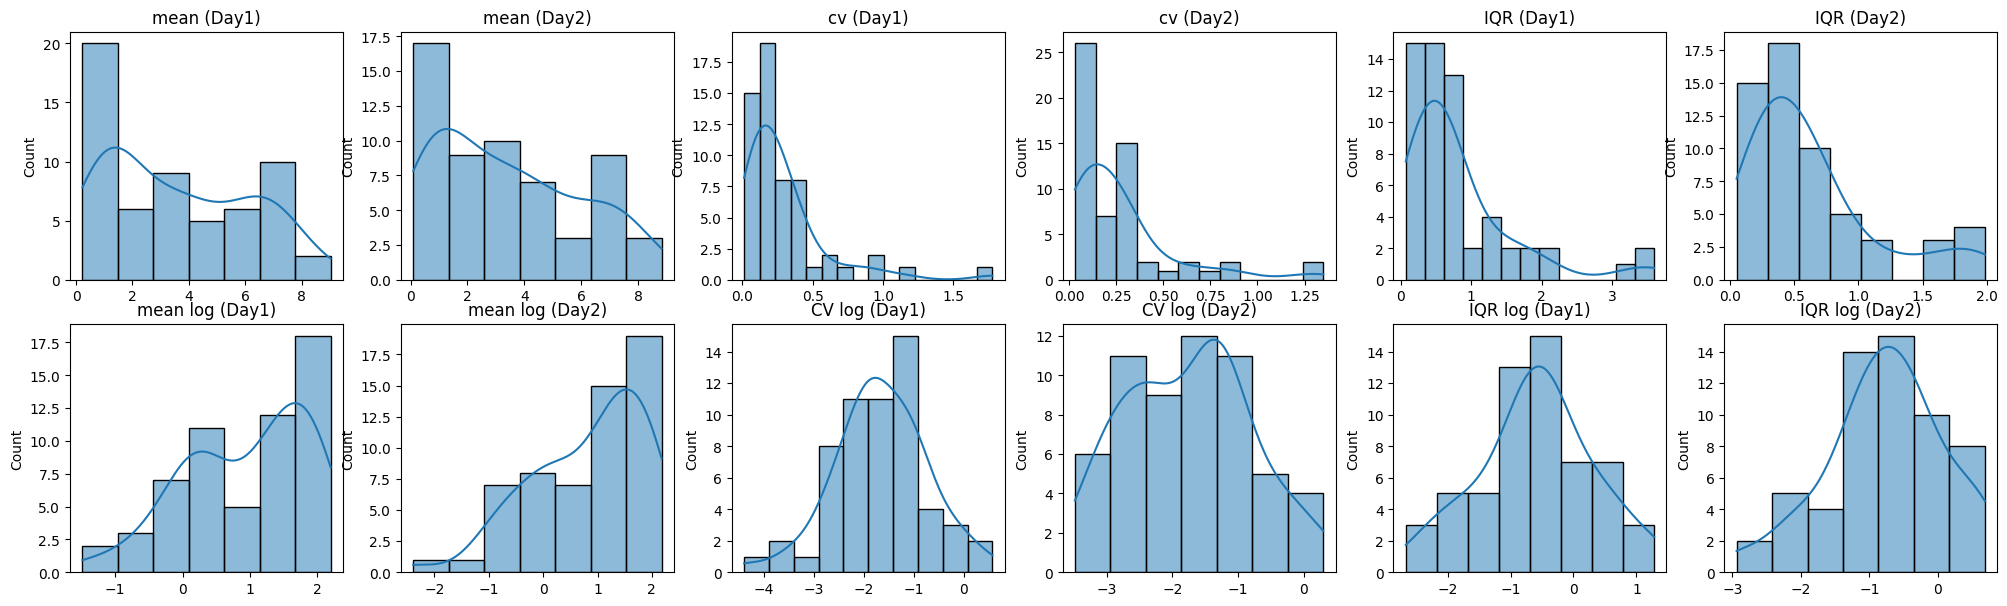

In [18]:
fig, ax = plt.subplots(2, 6)
fig.set_size_inches(20,6)
fig.tight_layout()
plt.subplot(2, 6, 1)
# sns.kdeplot(mean_Day1_list)
sns.histplot(mean_Day1_list,kde=True)
plt.title("mean (Day1)")
plt.subplot(2, 6, 2)
# sns.kdeplot(mean_Day2_list)
sns.histplot(mean_Day2_list,kde=True)
plt.title("mean (Day2)")
plt.subplot(2, 6, 3)
# sns.kdeplot(cv_Day1_list)
sns.histplot(cv_Day1_list,kde=True)
plt.title("cv (Day1)")
plt.subplot(2, 6, 4)
# sns.kdeplot(cv_Day2_list)
sns.histplot(cv_Day2_list,kde=True)
plt.title("cv (Day2)")
plt.subplot(2, 6, 5)
# sns.kdeplot(iqr_Day1_list)
sns.histplot(iqr_Day1_list,kde=True)
plt.title("IQR (Day1)")
plt.subplot(2, 6, 6)
# sns.kdeplot(iqr_Day2_list)
sns.histplot(iqr_Day2_list,kde=True)
plt.title("IQR (Day2)")
plt.subplot(2, 6, 7)
# sns.kdeplot(mean_Day1_log_list)
sns.histplot(mean_Day1_log_list,kde=True)
plt.title("mean log (Day1)")
plt.subplot(2, 6, 8)
# sns.kdeplot(mean_Day2_log_list)
sns.histplot(mean_Day2_log_list,kde=True)
plt.title("mean log (Day2)")
plt.subplot(2, 6, 9)
# sns.kdeplot(cv_Day1_log_list)
sns.histplot(cv_Day1_log_list,kde=True)
plt.title("CV log (Day1)")
plt.subplot(2, 6, 10)
# sns.kdeplot(cv_Day2_log_list)
sns.histplot(cv_Day2_log_list,kde=True)
plt.title("CV log (Day2)")
plt.subplot(2, 6, 11)
# sns.kdeplot(iqr_Day1_log_list)
sns.histplot(iqr_Day1_log_list,kde=True)
plt.title("IQR log (Day1)")
plt.subplot(2, 6, 12)
# sns.kdeplot(iqr_Day2_log_list)
sns.histplot(iqr_Day2_log_list,kde=True)
plt.title("IQR log (Day2)")
plt.show()

In [71]:
# mean
r_value,p_value=stats.pearsonr(mean_Day1_list, mean_Day2_list)
print("mean:\tr: "+str(r_value)+" p: "+str(p_value))
# std
r_value,p_value=stats.pearsonr(std_Day1_list, std_Day2_list)
print("std:\tr: "+str(r_value)+" p: "+str(p_value))
# cv
r_value,p_value=stats.pearsonr(cv_Day1_list, cv_Day2_list)
print("cv:\tr: "+str(r_value)+" p: "+str(p_value))
# fano
r_value,p_value=stats.pearsonr(fano_Day1_list, fano_Day2_list)
print("fano:\tr: "+str(r_value)+" p: "+str(p_value))
# iqr
r_value,p_value=stats.pearsonr(iqr_Day1_list, iqr_Day2_list)
print("iqr:\tr: "+str(r_value)+" p: "+str(p_value))
r_value,p_value=stats.pearsonr(frePSD_Day1_list, frePSD_Day2_list)
print("PSD:\tr: "+str(r_value)+" p: "+str(p_value))

mean:	r: 0.8099022913334939 p: 1.3782417063563035e-14
std:	r: 0.6767327513978982 p: 5.492137309182637e-09
cv:	r: 0.7515976776221874 p: 1.0588840683041504e-11
fano:	r: 0.8619812358792928 p: 3.6764776289782864e-18
iqr:	r: 0.5450616520986903 p: 9.691140700030253e-06
PSD:	r: 0.6525538860099621 p: 2.8504403049039622e-08


In [72]:
n_part=len(participant_list_Day1Day2rating)
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':mean_Day1_list+mean_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("mean:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':std_Day1_list+std_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("STD:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':cv_Day1_list+cv_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("CV:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':fano_Day1_list+fano_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("fano:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':iqr_Day1_list+iqr_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("IQR:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))
ICC_data_df=pd.DataFrame({
    'Day':['Day1']*n_part+['Day2']*n_part,
    'participants':np.concatenate((np.arange(1,n_part+1),np.arange(1,n_part+1))),
    'score':frePSD_Day1_list+frePSD_Day2_list
})
icc_df = pg.intraclass_corr(data=ICC_data_df, targets='participants', raters='Day', ratings='score')
print("PSD:\tICC: "+str(icc_df.ICC.mean())+" p: "+str(icc_df.pval.mean()))

mean:	ICC: 0.8526159362200749 p: 3.496372818699474e-15
STD:	ICC: 0.692607841937718 p: 7.221250613716065e-08
CV:	ICC: 0.8041094294739467 p: 3.730426789800245e-12
fano:	ICC: 0.8430716983210939 p: 1.1682044994468141e-14
IQR:	ICC: 0.5681363688032453 p: 4.422510690371223e-05
PSD:	ICC: 0.4479283900049456 p: 0.0021564807112116934


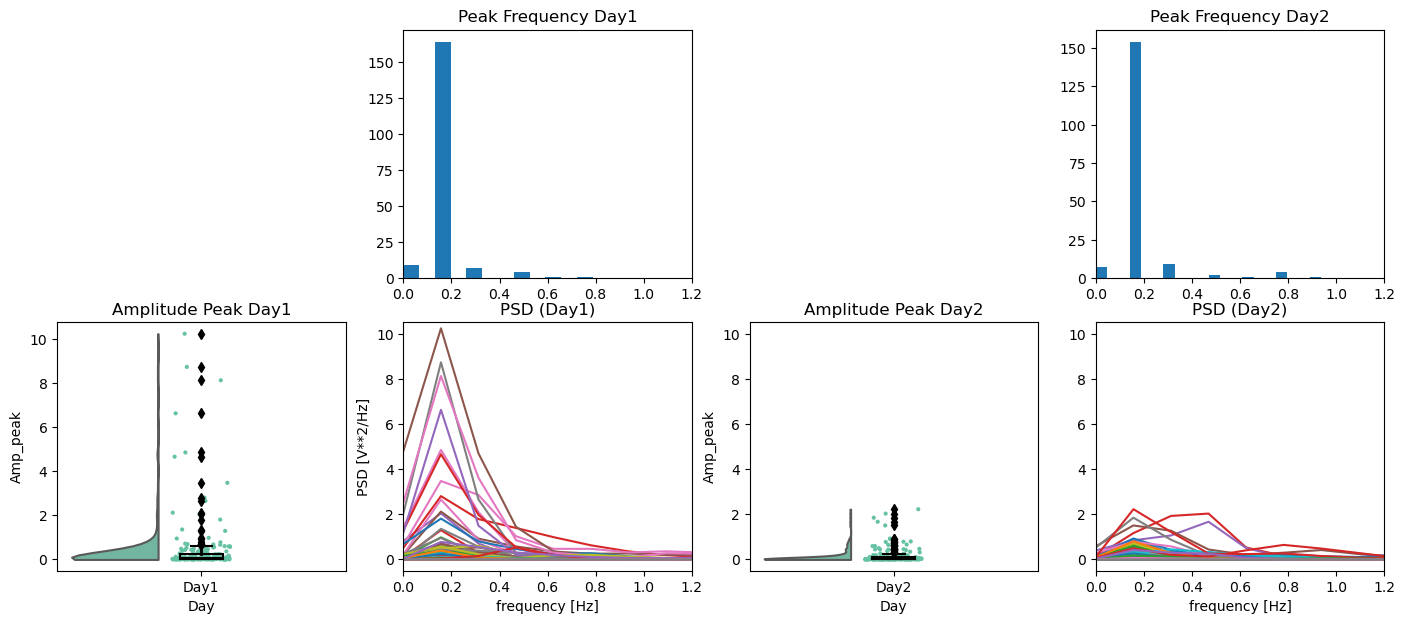

In [58]:
fs=40
f_max_list_Day1=[]
amp_max_list_Day1=[]
Fre_list_list_Day1=[]
Psd_list_list_Day1=[]
f_max_list_Day2=[]
amp_max_list_Day2=[]
Fre_list_list_Day2=[]
Psd_list_list_Day2=[]
for part in participant_list_Day1Day2rating:
    for signal in part.D1_rating:
        if len(signal)<256:
            continue
        (f, S)= welch(signal, fs)
        Fre_list_list_Day1.append(f)
        Psd_list_list_Day1.append(S)
        amp_max_list_Day1.append(S.max())
        f_max=f[S.argmax()]
        f_max_list_Day1.append(f_max)
    for signal in part.D2_rating:
        if len(signal)<256:
            continue
        # if CV(signal)<0.2:
        #     continue
        (f, S)= welch(signal, fs)
        Fre_list_list_Day2.append(f)
        Psd_list_list_Day2.append(S)
        amp_max_list_Day2.append(S.max())
        f_max=f[S.argmax()]
        f_max_list_Day2.append(f_max)

raincloud_Day1_df=pd.DataFrame({
    "Day": ['Day1']*len(Fre_list_list_Day1),
    "Fre_peak": Fre_list_list_Day1,
    "Amp_peak": amp_max_list_Day1
})
raincloud_Day2_df=pd.DataFrame({
    "Day": ['Day2']*len(Fre_list_list_Day2),
    "Fre_peak": Fre_list_list_Day2,
    "Amp_peak": amp_max_list_Day2
})
fig, ax = plt.subplots(2, 4)
fig.set_size_inches(14,6)
fig.tight_layout()
fig.delaxes(ax[0][0])
fig.delaxes(ax[0][2])
plt.subplot(2, 4, 2)
plt.hist(f_max_list_Day1,bins=50)
plt.xlim(0,1.2)
plt.title("Peak Frequency Day1")
plt.subplot(2, 4, 4)
plt.hist(f_max_list_Day2,bins=20)
plt.xlim(0,1.2)
plt.title("Peak Frequency Day2")
plt.subplot(2, 4, 5)
dy="Amp_peak"; dx="Day"; ort="v"; pal = "Set2"
ax=pt.half_violinplot( x = dx, y = dy, data = raincloud_Day1_df, palette = pal, \
                      bw = .2, cut = 0.,scale = "area", width = .6, \
                        inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = raincloud_Day1_df, palette = pal, \
                 edgecolor = "white",size = 3, jitter = 1, zorder = 0, \
                    orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = raincloud_Day1_df, color = "black", \
               width = .15, zorder = 10, showcaps = True, \
                boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, \
                    whiskerprops = {'linewidth':2, "zorder":10}, \
                        saturation = 1, orient = ort)
plt.title("Amplitude Peak Day1")
plt.subplot(2, 4, 7)
dy="Amp_peak"; dx="Day"; ort="v"; pal = "Set2"
ax=pt.half_violinplot( x = dx, y = dy, data = raincloud_Day2_df, palette = pal, \
                      bw = .2, cut = 0.,scale = "area", width = .6, \
                        inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = raincloud_Day2_df, palette = pal, \
                 edgecolor = "white",size = 3, jitter = 1, zorder = 0, \
                    orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = raincloud_Day2_df, color = "black", \
               width = .15, zorder = 10, showcaps = True, \
                boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, \
                    whiskerprops = {'linewidth':2, "zorder":10}, \
                        saturation = 1, orient = ort)
plt.ylim(-0.5,10.5)
plt.title("Amplitude Peak Day2")
plt.subplot(2, 4, 6)
for f_i,f in enumerate(Fre_list_list_Day1):
    S=Psd_list_list_Day1[f_i]
    plt.plot(f, S)
    plt.xlim(0,1.2)
    plt.ylim(-0.5,10.5)
plt.title("PSD (Day1)")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.subplot(2, 4, 8)
for f_i,f in enumerate(Fre_list_list_Day2):
    S=Psd_list_list_Day2[f_i]
    plt.plot(f, S)
    plt.xlim(0,1.2)
    plt.ylim(-0.5,10.5)
plt.title("PSD (Day2)")
plt.xlabel('frequency [Hz]')
plt.show()

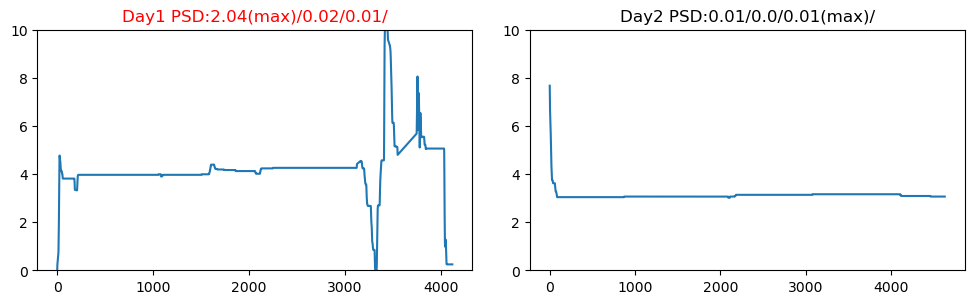

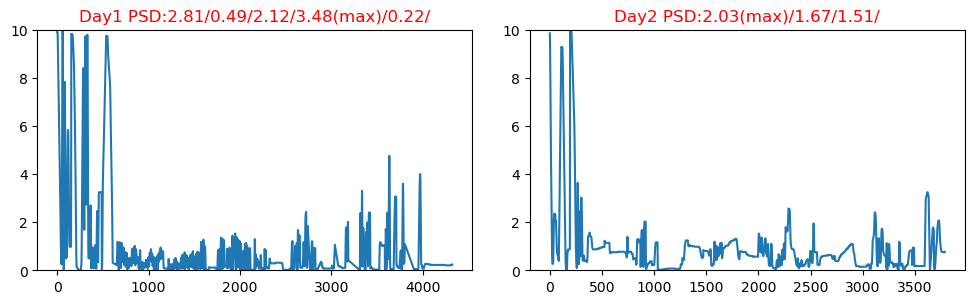

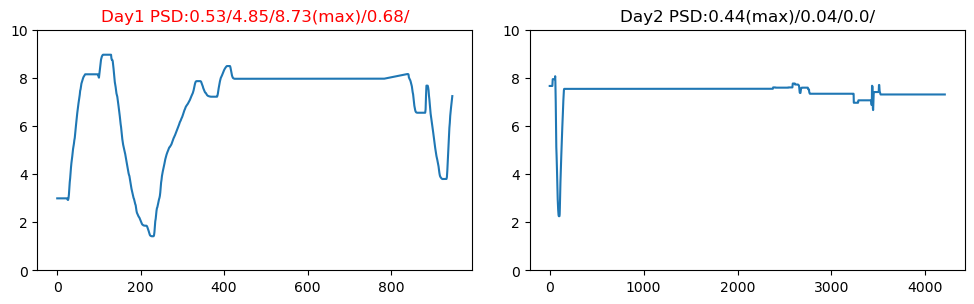

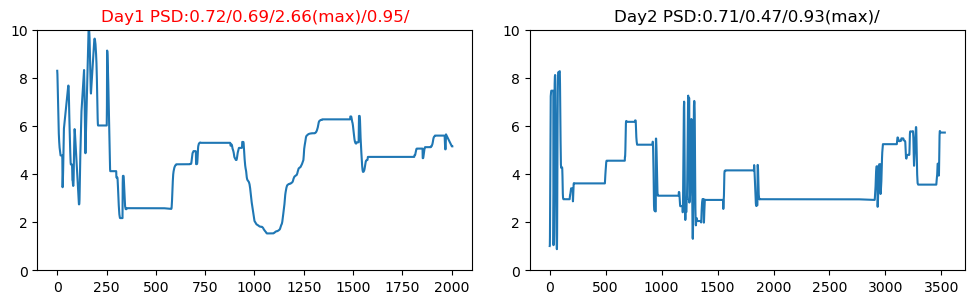

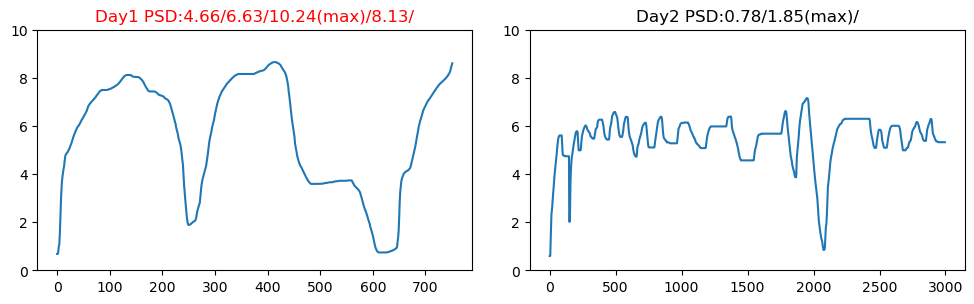

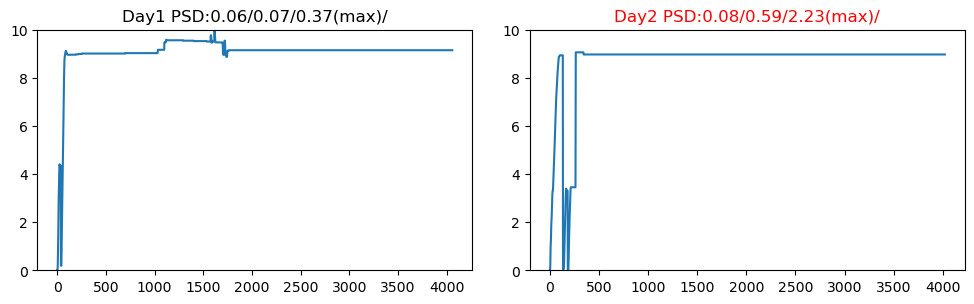

In [152]:
PID_list_day1=[]
PID_list_day2=[]
max_range=2
for part in participant_list_Day1Day2rating:
    for signal in part.D1_rating:
        if len(signal)<256:
            continue
        (f, S)= welch(signal, fs)
        if S.max()>max_range:
            if part.PID not in PID_list_day1:
                PID_list_day1.append(part.PID)
for part in participant_list_Day1Day2rating:
    for signal in part.D2_rating:
        if len(signal)<256:
            continue
        (f, S)= welch(signal, fs)
        if S.max()>max_range:
            if part.PID not in PID_list_day2:
                PID_list_day2.append(part.PID)
for part in participant_list_Day1Day2rating:
    if part.PID in PID_list_day1 or part.PID in PID_list_day2:
        S1_max=0
        S1_max_idx=0
        S1_list=[]
        for s_i,signal in enumerate(part.D1_rating):
            if len(signal)<256:
                continue
            (f, S)= welch(signal, fs)
            S1_list.append(S.max())
            if S1_max<=S.max():
                S1_max=S.max()
                S1_max_idx=s_i
        S1_title="Day1 PSD:"
        for S_m in S1_list:
            if S_m==S1_max:
                S1_title=S1_title+str(round(S_m,2))+"(max)/"
            else:
                S1_title=S1_title+str(round(S_m,2))+"/"
        S2_max=0
        S2_max_idx=0
        S2_list=[]
        for s_i,signal in enumerate(part.D2_rating):
            if len(signal)<256:
                continue
            (f, S)= welch(signal, fs)
            S2_list.append(S.max())
            if S2_max<=S.max():
                S2_max=S.max()
                S2_max_idx=s_i
        S2_title="Day2 PSD:"
        for S_m in S2_list:
            if S_m==S2_max:
                S2_title=S2_title+str(round(S_m,2))+"(max)/"
            else:
                S2_title=S2_title+str(round(S_m,2))+"/"
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(10,3)
        fig.tight_layout()
        plt.subplot(1, 2, 1)
        plt.plot(part.D1_rating[S1_max_idx])
        plt.ylim(0,10)
        if S1_max>max_range:
            plt.title(S1_title,color='r')
        else:
            plt.title(S1_title)
        plt.subplot(1, 2, 2)
        plt.plot(part.D2_rating[S2_max_idx])
        plt.ylim(0,10)
        if S2_max>max_range:
            plt.title(S2_title,color='r')
        else:
            plt.title(S2_title)
        plt.show()

Axes(0.125,0.11;0.775x0.77)


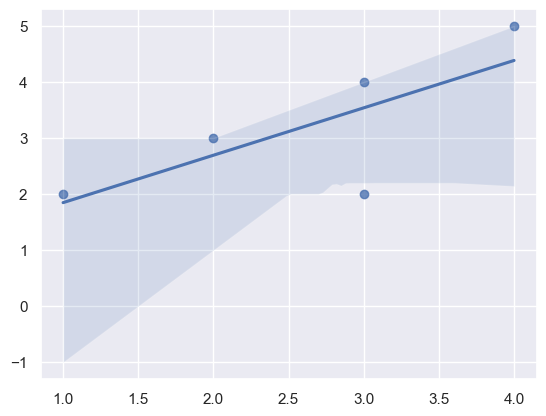

Axes(0.125,0.11;0.775x0.77)


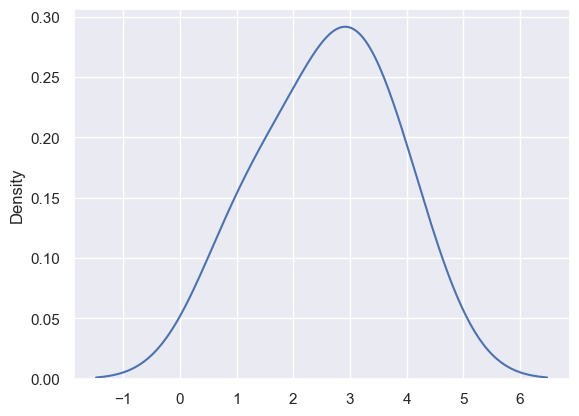

In [143]:
# Define custom function to draw a scatter plot with a correlation line
def scatter_with_correlation_line(x, y, color='blue', label=None):
    x=np.array(x)
    y=np.array(y)
    ax = plt.gca()  # Get the currently active axes
    print(ax)
    if np.array_equal(x, y)==False:
        sns.regplot(x=x,y=y)
    else:
        sns.kdeplot(y)
x=[1,3,2,4,3]
y=[2,4,3,5,2]
z=x
scatter_with_correlation_line(x, y)
plt.show()
scatter_with_correlation_line(x, z)
plt.show()

# First Question: rating with clinical outcome

          mean        CV       IQR
mean  1.000000 -0.491513  0.326397
CV   -0.491513  1.000000  0.155847
IQR   0.326397  0.155847  1.000000
          mean        CV     IQR
mean  1.000000  0.000089  0.0124
CV    0.000089  1.000000  1.0000
IQR   0.012400  1.000000  1.0000


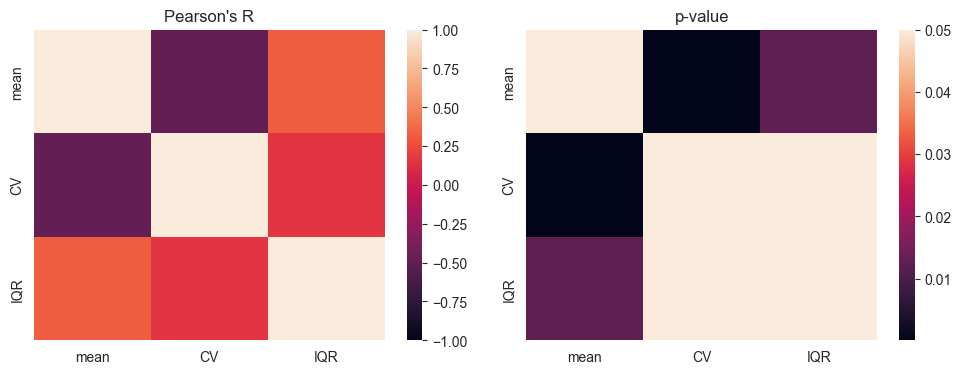

In [27]:
rating_vari_df=pd.DataFrame({
    'mean':mean_Day1_list,
    # 'STD':std_Day1_list,
    'CV':cv_Day1_list,
    # 'Fano factor':fano_Day1_list,
    'IQR':iqr_Day1_list,
    # 'PSD':frePSD_Day1_list
})
cormat = rating_vari_df.corr()
cormat_variability=cormat#.iloc[0:1,1:3]
print(cormat_variability)
pvalues = rating_vari_df.corr(method=lambda x, y: pearsonr(x, y)[1])
pvalue_variability=pvalues#.iloc[0:1,1:3]
corrected_pvalue_variability = p_value_correction_square_fdr(pvalue_variability.to_numpy(),0.05)
corrected_pvalue_variability_df = pd.DataFrame(data = corrected_pvalue_variability,\
    index = pvalue_variability.index,\
        columns = pvalue_variability.columns)
print(corrected_pvalue_variability_df)
round(cormat,2)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,3.7)
fig.tight_layout()
plt.subplot(1, 2, 1)
sns.heatmap(cormat_variability, vmin=-1, vmax=1)
plt.title("Pearson's R")
# plt.show()
plt.subplot(1, 2, 2)
sns.heatmap(corrected_pvalue_variability_df, vmax=0.05)
plt.title("p-value")
plt.show()

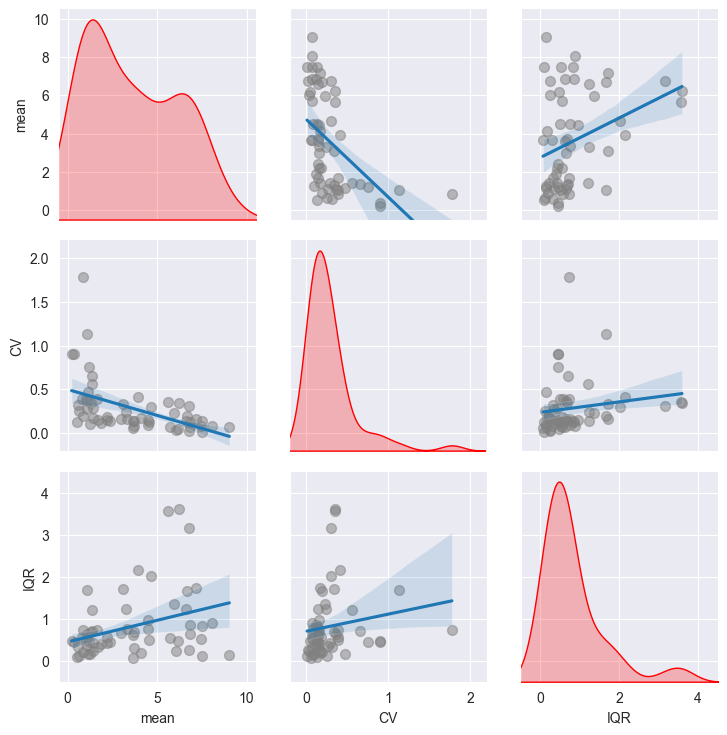

In [29]:
sns.set_style('darkgrid')
g = sns.PairGrid(rating_vari_df, diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True,color='red') 
g.map_offdiag(sns.regplot,scatter_kws={'s':50,'alpha':0.5,'color':'gray'})
# g.map_offdiag(scatter_with_correlation_line)
g.axes[0,0].set_xlim((-0.5,10.5))
g.axes[0,1].set_xlim((-0.2,2.2))
g.axes[0,2].set_xlim((-0.5,4.5))
# g.axes[0,3].set_xlim((-0.5,8))
g.axes[0,2].set_ylim((-0.5,10.5))
g.axes[1,2].set_ylim((-0.2,2.2))
g.axes[2,2].set_ylim((-0.5,4.5))
# g.axes[3,2].set_ylim((-0.5,8))
plt.show()
# g.axes[0,1]
# g.map_offdiag(scatter_with_correlation_line)

## after log transformation

          mean        CV       IQR
mean  1.000000 -0.627079  0.321836
CV   -0.627079  1.000000  0.401810
IQR   0.321836  0.401810  1.000000
              mean            CV       IQR
mean  1.000000e+00  1.388057e-07  0.013755
CV    1.388057e-07  1.000000e+00  0.001770
IQR   1.375480e-02  1.769726e-03  1.000000


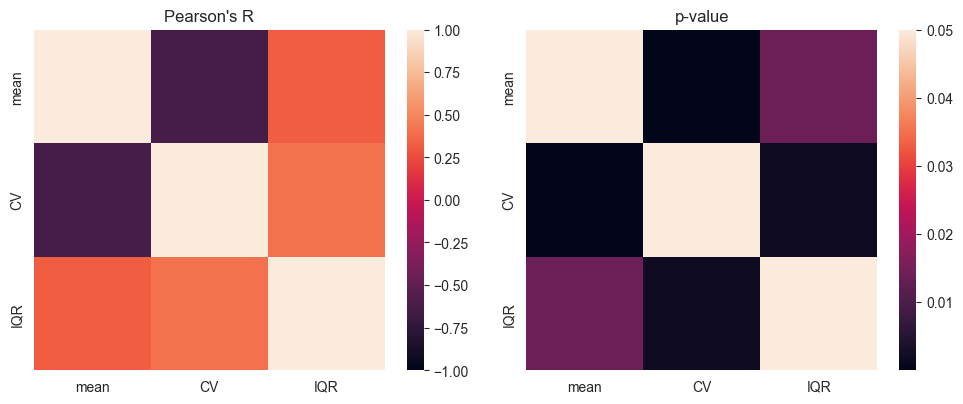

In [48]:
rating_vari_df_log=pd.DataFrame({
    'mean':mean_Day1_log_list,
    # 'STD':std_Day1_list,
    'CV':cv_Day1_log_list,
    # 'Fano factor':fano_Day1_list,
    'IQR':iqr_Day1_log_list,
})
cormat = rating_vari_df_log.corr()
cormat_variability=cormat
print(cormat_variability)
pvalues = rating_vari_df_log.corr(method=lambda x, y: pearsonr(x, y)[1])
pvalue_variability=pvalues
corrected_pvalue_variability = p_value_correction_square_fdr(pvalue_variability.to_numpy(),0.05)
corrected_pvalue_variability_df = pd.DataFrame(data = corrected_pvalue_variability,\
    index = pvalue_variability.index,\
        columns = pvalue_variability.columns)
print(corrected_pvalue_variability_df)
# round(cormat,2)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,4)
fig.tight_layout()
plt.subplot(1, 2, 1)
sns.heatmap(cormat_variability, vmin=-1, vmax=1)
plt.title("Pearson's R")
# plt.show()
plt.subplot(1, 2, 2)
sns.heatmap(corrected_pvalue_variability_df, vmax=0.05)
plt.title("p-value")
plt.show()

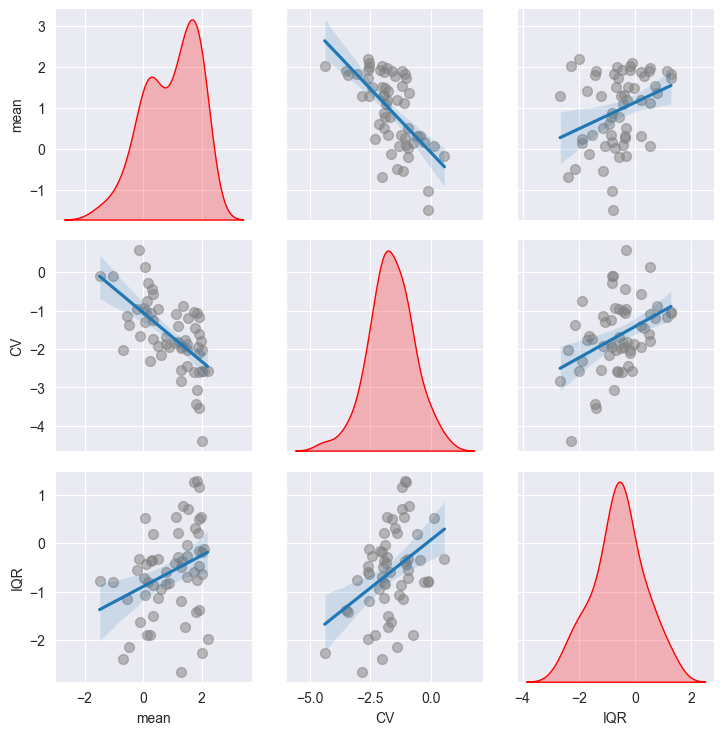

In [58]:
sns.set_style('darkgrid')
g = sns.PairGrid(rating_vari_df_log, diag_sharey=False)#, corner=True)
g.map_diag(sns.kdeplot, fill=True,color='red') 
g.map_offdiag(sns.regplot,scatter_kws={'s':50,'alpha':0.5,'color':'gray'})
# g.map_offdiag(scatter_with_correlation_line)
# g.axes[0,0].set_xlim((-0.5,10.5))
# g.axes[0,1].set_xlim((-0.2,2.2))
# g.axes[0,2].set_xlim((-0.5,4.5))
# g.axes[0,2].set_ylim((-0.5,10.5))
# g.axes[1,2].set_ylim((-0.2,2.2))
# g.axes[2,2].set_ylim((-0.5,4.5))
plt.show()

In [291]:
Carl_pain_rating_df=pd.read_pickle('../data/CBP_rating.pkl')
Carl_part_list=[]
PID_list=[]
for index,row in Carl_pain_rating_df.iterrows():
    if row.PID in PID_list:
        continue
    else:
        PID_list.append(row.PID)
    partcipant=Carl_pain_rating(row.PID)
    if row.D1_rating!=[]:
        partcipant.insert_rating_time_D1(datadiv(row.D1_rating,10),14.4)
        Carl_part_list.append(partcipant)
print(len(Carl_part_list))

24


In [292]:
mean_list=[part.mean_rating() for part in Carl_part_list]
std_list=[part.std() for part in Carl_part_list]
cv_list=[part.cv() for part in Carl_part_list]
fano_list=[part.fanofactor() for part in Carl_part_list]
iqr_list=[part.IQR() for part in Carl_part_list]

            CV  Fano factor       IQR
mean -0.332828    -0.087069 -0.022359
STD   0.906833     0.954752  0.991500


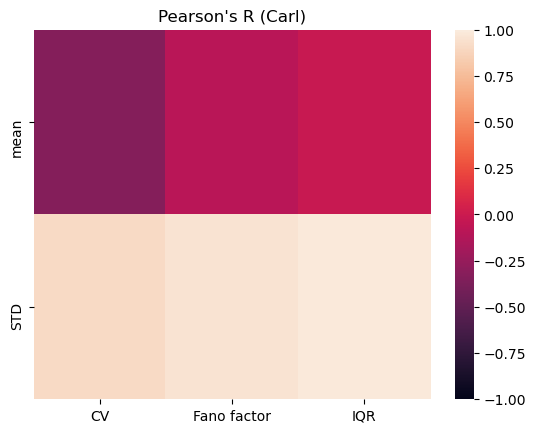

In [299]:
Carl_rating_vari_df=pd.DataFrame({
    'mean':mean_list,
    'STD':std_list,
    'CV':cv_list,
    'Fano factor':fano_list,
    'IQR':iqr_list
})
cormat = Carl_rating_vari_df.corr()
cor_variability=cormat.iloc[0:2,2:5]
print(cor_variability)
# round(cormat,2)
sns.heatmap(cor_variability, vmin=-1, vmax=1)
plt.title("Pearson's R (Carl)")
plt.show()

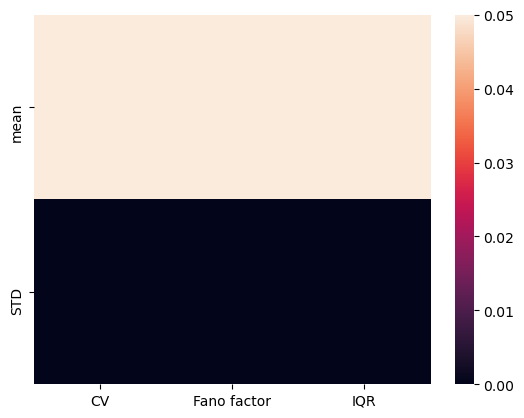

In [297]:
pvalues = Carl_rating_vari_df.corr(method=lambda x, y: pearsonr(x, y)[1])
pvalue_variability=pvalues.iloc[0:2,2:5]
sns.heatmap(pvalue_variability, vmax=0.05)
plt.show()

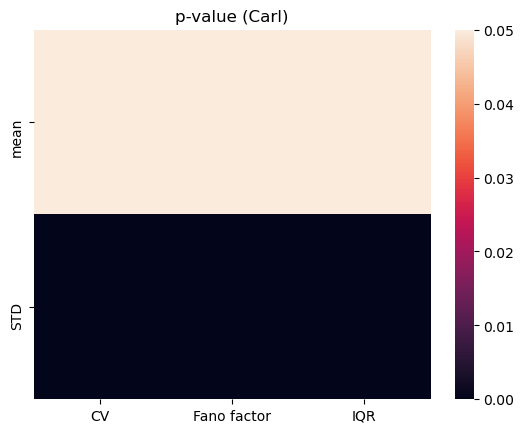

In [300]:
corrected_pvalue_variability = p_value_correction_rectangle_fdr(pvalue_variability.to_numpy(),0.05)
corrected_pvalue_df = pd.DataFrame(data = corrected_pvalue_variability,\
    index = pvalue_variability.index,\
        columns = pvalue_variability.columns)
sns.heatmap(corrected_pvalue_df, vmax=0.05)
plt.title("p-value (Carl)")
plt.show()

In [59]:
participant_clinical_list=[]
print(len(participant_list))
for part in participant_list:
    found_1=False
    for index,row in df_BPI_START.iterrows():
        if row.PROLIFIC_PID==part.PID:
            bpi_s=row['BPI Mean Severity Score']
            found_1=True
            break
    if found_1==False:
        print(part.PID+" Not Found(BPI)")
    found_2=False
    for index,row in df_PCS_GAD_PHQ.iterrows():
        if row.PROLIFIC_PID==part.PID:
            pcs_t=row['Total PCS Score']
            pcs_r=row['PCS Rumination Score']
            pcs_m=row['PCS Magnification Score']
            found_2=True
            break
    if found_2==False:
        print(part.PID+" Not Found (PCS)")
    found_3=False
    for index,row in df_MSK.iterrows():
        if row.PROLIFIC_PID==part.PID:
            msk=row['Score']
            found_3=True
            break
    if found_3==False:
        print(part.PID+" Not Found (MSK)")
    found_4=False
    for index,row in df_hmm.iterrows():
        if row.PID==part.PID:
            if np.isnan(row['nstate_D2'])==False:
                nstate_D1=row['nstate_D1']
                hmmscore_D1=row['score_D1']
                nstate_D2=row['nstate_D2']
                hmmscore_D2=row['score_D2']
                found_4=True
                break
    if found_4==False:
        print(part.PID+" Not Found (HMM)")
    if found_1 and found_2 and found_3 and found_4:
        part_clinical=pain_pred_acc_clinical(part.PID)
        part_clinical.update(part,nstate1=nstate_D1,hmmscore1=hmmscore_D1,\
                                nstate2=nstate_D2,hmmscore2=hmmscore_D2,\
                                    msk=msk,BPI_S=bpi_s,PCS_T=pcs_t,PCS_R=pcs_r,PCS_M=pcs_m)
        participant_clinical_list.append(part_clinical)
print(len(participant_clinical_list))

41
5a9ea9fe1ade740001b92063 Not Found(BPI)
6235d96c087939dba5586d97 Not Found(BPI)
6148a15571fc73becd361f1b Not Found(BPI)
5bc5f36b8d83e10001724601 Not Found(BPI)
58fa36995214e3000193281c Not Found(BPI)
36


In [60]:
mean1_list=[];std1_list=[];cv1_list=[];IQR1_list=[];fano1_list=[];psd1_list=[]
mean2_list=[];std2_list=[];cv2_list=[];IQR2_list=[];fano2_list=[];psd2_list=[]
prediction_list=[];confidence_list=[];acc_list=[]
nstate_D1_list=[];hmmscore_D1_list=[]
nstate_D2_list=[];hmmscore_D2_list=[]

msk_list=[];BPI_severity_list=[]
pcs_total_list=[];pcs_rumination_list=[];pcs_magnification_list=[]
for part in participant_clinical_list:
    if part.check_isnan():
        continue
    mean1_list.append(part.mean1)
    std1_list.append(part.std1)
    cv1_list.append(part.cv1)
    IQR1_list.append(part.IQR1)
    fano1_list.append(part.fano1)
    psd1_list.append(part.psd1)
    mean2_list.append(part.mean2)
    std2_list.append(part.std2)
    cv2_list.append(part.cv2)
    IQR2_list.append(part.IQR2)
    fano2_list.append(part.fano2)
    psd2_list.append(part.psd2)

    prediction_list.append(part.prediction)
    confidence_list.append(part.confidence)
    acc_list.append(part.acc)

    nstate_D1_list.append(part.nstate_D1)
    hmmscore_D1_list.append(part.hmmscore_D1)
    nstate_D2_list.append(part.nstate_D2)
    hmmscore_D2_list.append(part.hmmscore_D2)

    msk_list.append(part.msk)
    BPI_severity_list.append(part.BPI_severity)
    pcs_total_list.append(part.pcs_total)
    pcs_rumination_list.append(part.pcs_rumination)
    pcs_magnification_list.append(part.pcs_magnification)


61268bfae35dcb011f6081b5 invalid
6229de2e4db607c098f60d39 invalid
59bd33823c45a10001ccca27 invalid


C:\Users\28946\AppData\Local\Temp\ipykernel_7376\3192565327.py:3: RuntimeWarning: divide by zero encountered in log
  pcs_total_log_list=[np.log(pcs) for pcs in pcs_total_list]


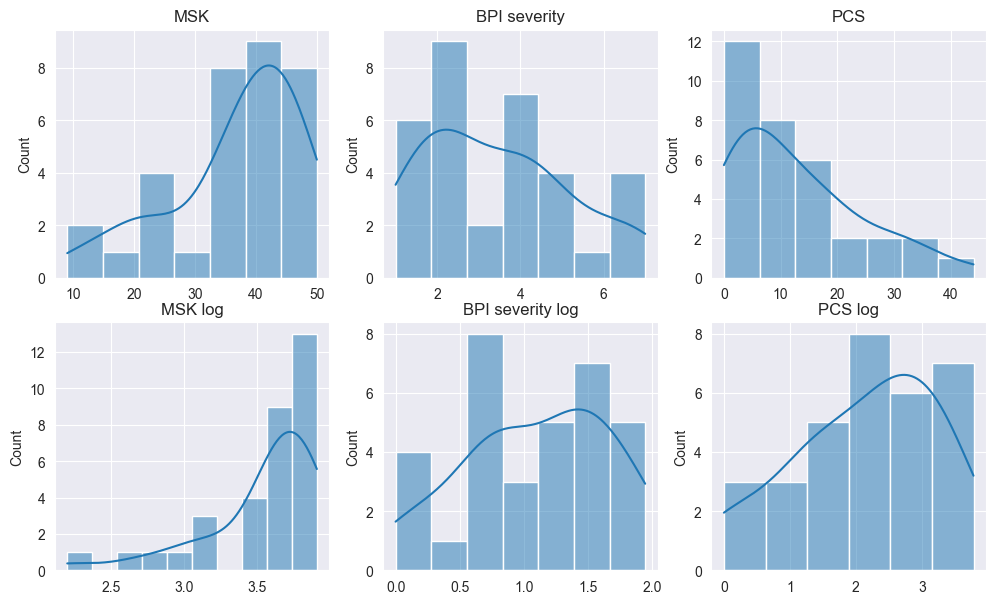

In [62]:
msk_log_list=[np.log(msk) for msk in msk_list]
BPI_severity_log_list=[np.log(bpi) for bpi in BPI_severity_list]
pcs_total_log_list=[np.log(pcs) for pcs in pcs_total_list]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10,6)
fig.tight_layout()
plt.subplot(2, 3, 1)
sns.histplot(msk_list,kde=True)
plt.title("MSK")
plt.subplot(2, 3, 2)
sns.histplot(BPI_severity_list,kde=True)
plt.title("BPI severity")
plt.subplot(2, 3, 3)
sns.histplot(pcs_total_list,kde=True)
plt.title("PCS")
plt.subplot(2, 3, 4)
sns.histplot(msk_log_list,kde=True)
plt.title("MSK log")
plt.subplot(2, 3, 5)
sns.histplot(BPI_severity_log_list,kde=True)
plt.title("BPI severity log")
plt.subplot(2, 3, 6)
sns.histplot(pcs_total_log_list,kde=True)
plt.title("PCS log")
plt.show()

In [63]:
mean_log_list=[np.log(mean) for mean in mean2_list]
cv_log_list=[np.log(cv) for cv in cv2_list]
iqr_log_list=[np.log(iqr) for iqr in IQR2_list]

In [66]:
clincal_basic=pd.DataFrame({
    # 'mean':mean2_list,
    # 'cv':cv2_list,
    # 'IQR':IQR2_list,
    'mean log':mean_log_list,
    'cv log':cv_log_list,
    'IQR log':iqr_log_list,
    
    'MSK':msk_list,
    'BPI Severity':BPI_severity_list,
    'PCS':pcs_total_list,
    # 'MSK log':msk_log_list,
    # 'BPI Severity log':BPI_severity_log_list,
    # 'PCS log':pcs_total_log_list,
    })
cormat,pvalues = cal_corr_pvalues(clincal_basic)

               MSK  BPI Severity       PCS
mean log -0.595046      0.741670  0.537172
cv log    0.484886     -0.633515 -0.288942
IQR log  -0.302057      0.379572  0.444874
               MSK  BPI Severity       PCS
mean log  0.000260  7.870985e-07  0.001267
cv log    0.004238  7.575286e-05  1.000000
IQR log   1.000000  2.935603e-02  0.009484


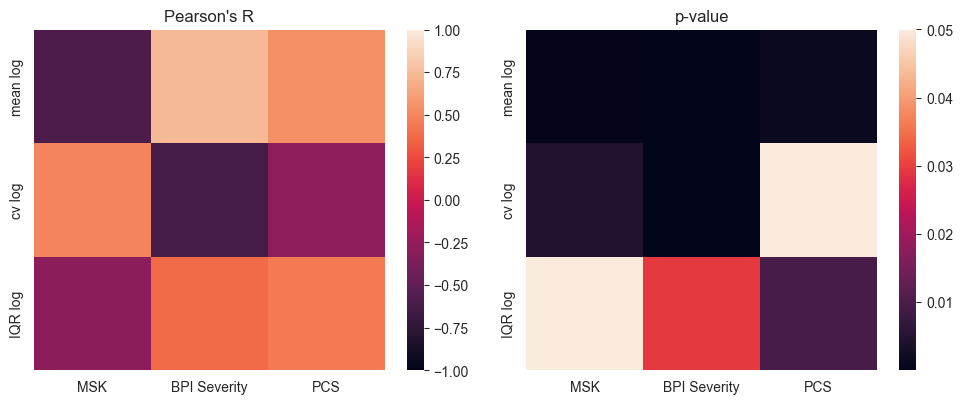

In [71]:
cormat_clinical, corrected_pvalue_clinical_df=cut_corrected(cormat,pvalues,0,3,3,7)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,4)
fig.tight_layout()
plt.subplot(1, 2, 1)
sns.heatmap(cormat_clinical, vmin=-1, vmax=1)
plt.title("Pearson's R")
plt.subplot(1, 2, 2)
# plt.show()
sns.heatmap(corrected_pvalue_clinical_df, vmax=0.05)
plt.title("p-value")
plt.show()

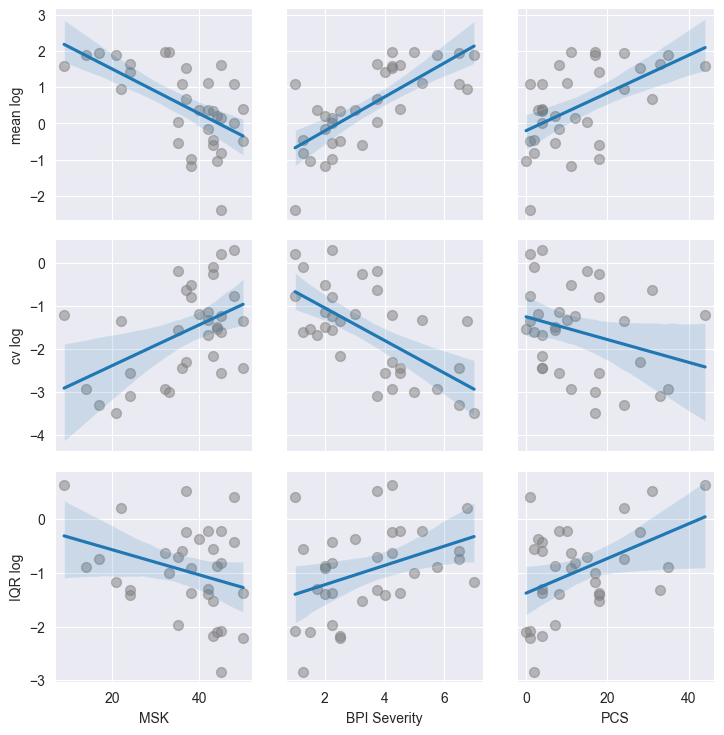

In [68]:
sns.set_style('darkgrid')
g = sns.PairGrid(clincal_basic, diag_sharey=False,  
                 x_vars=['MSK', 'BPI Severity', 'PCS'],
                 y_vars=['mean log','cv log','IQR log'])
g.map_diag(sns.kdeplot, fill=True) 
g.map_offdiag(sns.regplot,scatter_kws={'s':50,'alpha':0.5,'color':'gray'})
# g.axes[0,0].set_xlim((-0.5,8))
# g.axes[0,1].set_xlim((-0.2,1.5))
# g.axes[0,2].set_xlim((-0.5,2.5))
# g.axes[0,3].set_xlim((-0.5,2))
# g.axes[0,4].set_xlim((0,55))
# g.axes[0,5].set_xlim((0,8))
# g.axes[0,6].set_xlim((-0.5,50))

# g.axes[0,0].set_ylim((-0.5,8))
# g.axes[1,0].set_ylim((-0.2,1.5))
# g.axes[2,0].set_ylim((-0.5,2.5))
# g.axes[3,0].set_ylim((-0.5,2))
# g.axes[4,0].set_ylim((0,55))
# g.axes[5,0].set_ylim((0,8))
# g.axes[6,0].set_ylim((-0.5,50))
plt.show()

          mean        CV       IQR       MSK  BPI Severity       PCS
mean  1.000000 -0.491513  0.326397 -0.682101      0.721561  0.555443
CV   -0.491513  1.000000  0.155847  0.365859     -0.483637 -0.237179
IQR   0.326397  0.155847  1.000000 -0.281642      0.227334  0.455910
          mean        CV       IQR       MSK  BPI Severity       PCS
mean  1.000000  0.000089  0.012400  0.000012      0.000002  0.000792
CV    0.000089  1.000000  0.242722  0.036271      0.004352  0.183844
IQR   0.012400  0.242722  1.000000  0.112318      0.203261  0.007665


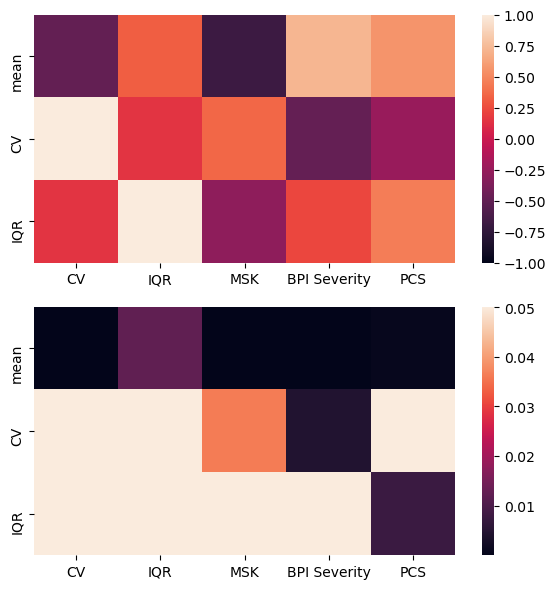

In [80]:
cor_data_var=cormat_variability.to_numpy()
cor_data_clinic=cormat_clinical.to_numpy()
p_data_var=pvalue_variability.to_numpy()
p_data_clinic=pvalues_clinical.to_numpy()
# DF=np.concatenate([[df_1],[df_2]])
cor_data=np.concatenate((cor_data_var,cor_data_clinic), axis=1)
col=np.concatenate((cormat_variability.columns,cormat_clinical.columns))
cor_DF=pd.DataFrame(data=cor_data,columns=col,index=cormat_variability.index)
p_data=np.concatenate((p_data_var,p_data_clinic), axis=1)
p_DF=pd.DataFrame(data=p_data,columns=col,index=cormat_variability.index)
print(cor_DF)
print(p_DF)
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()
plt.subplot(2, 1, 1)
sns.heatmap(cor_DF.iloc[:,1:], vmin=-1, vmax=1)
plt.subplot(2, 1, 2)
sns.heatmap(p_DF.iloc[:,1:], vmax=0.05)
plt.show()

# Second question: prediction with rating and clinical outcome

In [154]:
Prediction_basic=pd.DataFrame({
    'prediction':prediction_list,
    # 'confidence':confidence_list,
    # 'accuracy':acc_list,

    # 'mean Day2':mean2_list,
    # 'std Day2':std2_list,
    # 'cv Day2':cv2_list,
    # 'IQR Day2':IQR2_list,
    # 'fano factor Day2':fano2_list,

    # 'nstate_D1':nstate_D1_list,
    # 'hmmscore_D1':hmmscore_D1_list,
    # 'nstate_D2':nstate_D2_list,
    # 'hmmscore_D2':hmmscore_D2_list,
    
    'MSK':msk_list,
    'BPI Severity':BPI_severity_list,
    'PCS':pcs_total_list,
    # 'PCS Rumination':pcs_rumination_list,
    # 'PCS Magnification':pcs_magnification_list,
    
    })
cormat = Prediction_basic.corr()
pvalues = Prediction_basic.corr(method=lambda x, y: pearsonr(x, y)[1])

                 MSK  BPI Severity       PCS
prediction -0.648704      0.785537  0.445987
                 MSK  BPI Severity       PCS
prediction  0.000044  6.139442e-08  0.009285


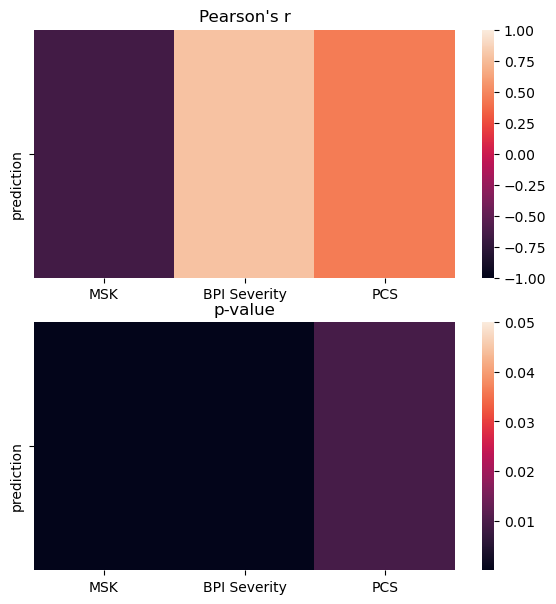

In [159]:
cormat_prediction=cormat.iloc[0:1,1:]
print(cormat_prediction)
# cormat_clinical.to_csv('../data/dataset/correlation_clinical.csv')
pvalues_prediction=pvalues.iloc[0:1,1:]
corrected_pvalues_prediction=p_value_correction_rectangle_fdr(pvalues_prediction.to_numpy(),0.05)
# pvalues_meantohmm.to_csv('../data/dataset/pvalues_meantohmm.csv')
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()
plt.subplot(2, 1, 1)
sns.heatmap(cormat_prediction, vmin=-1, vmax=1)
plt.title("Pearson's r")
plt.subplot(2, 1, 2)
corrected_pvalue_prediction_df = pd.DataFrame(data = corrected_pvalues_prediction,\
    index = pvalues_prediction.index,\
        columns = pvalues_prediction.columns)
print(corrected_pvalue_prediction_df)
sns.heatmap(corrected_pvalue_prediction_df, vmax=0.05)
plt.title("p-value")
plt.show()

C:\Users\28946\AppData\Local\Temp\ipykernel_7376\3555330654.py:22: RuntimeWarning: divide by zero encountered in log
  prediction_log_list=[np.log(pred) for pred in prediction_list_p]


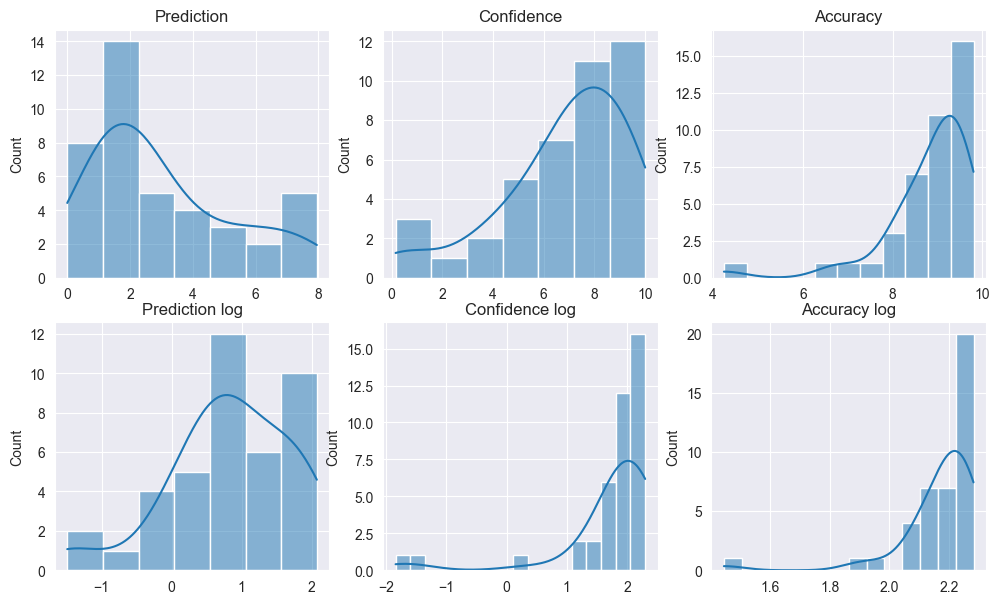

In [70]:
participant_prediction_list=[]
for part in participant_list:
    part_pred=pain_pred_acc_conf(part.PID)
    part_pred.update(part)
    if part_pred.check_isnan()==False:
        participant_prediction_list.append(part_pred)
mean2_list_p=[];std2_list_p=[];cv2_list_p=[];IQR2_list_p=[];fano2_list_p=[];psd2_list_p=[]
prediction_list_p=[];confidence_list_p=[];acc_list_p=[]
for part in participant_prediction_list:
    mean2_list_p.append(part.mean2)
    std2_list_p.append(part.std2)
    cv2_list_p.append(part.cv2)
    IQR2_list_p.append(part.IQR2)
    psd2_list_p.append(part.psd2)

    prediction_list_p.append(part.prediction)
    confidence_list_p.append(part.confidence)
    acc_list_p.append(part.acc)
mean2_log_list=[np.log(mean) for mean in mean2_list_p]
cv2_log_list=[np.log(cv) for cv in cv2_list_p]
IQR2_log_list=[np.log(iqr) for iqr in IQR2_list_p]
prediction_log_list=[np.log(pred) for pred in prediction_list_p]
confidence_log_list=[np.log(conf) for conf in confidence_list_p]
acc_log_list=[np.log(acc) for acc in acc_list_p]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10,6)
fig.tight_layout()
plt.subplot(2, 3, 1)
sns.histplot(prediction_list_p,kde=True)
plt.title("Prediction")
plt.subplot(2, 3, 2)
sns.histplot(confidence_list_p,kde=True)
plt.title("Confidence")
plt.subplot(2, 3, 3)
sns.histplot(acc_list_p,kde=True)
plt.title("Accuracy")
plt.subplot(2, 3, 4)
sns.histplot(prediction_log_list,kde=True)
plt.title("Prediction log")
plt.subplot(2, 3, 5)
sns.histplot(confidence_log_list,kde=True)
plt.title("Confidence log")
plt.subplot(2, 3, 6)
sns.histplot(acc_log_list,kde=True)
plt.title("Accuracy log")
plt.show()

In [78]:
Prediction_ratingonly=pd.DataFrame({
    'prediction':prediction_list_p,
    'accuracy':acc_list_p,
    'confidence':confidence_list_p,
    # 'prediction log':prediction_log_list,
    # 'accuracy log':acc_log_list,
    # 'confidence log':confidence_log_list,

    'mean log Day2':mean2_log_list,
    # 'std Day2':std2_list_p,
    'cv log Day2':cv2_log_list,
    'IQR log Day2':IQR2_log_list,
    # 'PSD Day2':psd2_list_p,

    # 'nstate_D1':nstate_D1_list,
    # 'hmmscore_D1':hmmscore_D1_list,
    # 'nstate_D2':nstate_D2_list,
    # 'hmmscore_D2':hmmscore_D2_list,
    
    # 'MSK':msk_list,
    # 'BPI Severity':BPI_severity_list,
    # 'PCS':pcs_total_list,
    # 'PCS Rumination':pcs_rumination_list,
    # 'PCS Magnification':pcs_magnification_list,
    
    })
cormat,pvalues = cal_corr_pvalues(Prediction_ratingonly)

            confidence  mean log Day2  cv log Day2  IQR log Day2
prediction   -0.093388       0.730784    -0.753080      0.196135
accuracy      0.400570      -0.206291    -0.040607      0.088208
            confidence  mean log Day2   cv log Day2  IQR log Day2
prediction    1.000000   5.804082e-08  1.342775e-08           1.0
accuracy      0.009452   1.000000e+00  1.000000e+00           1.0


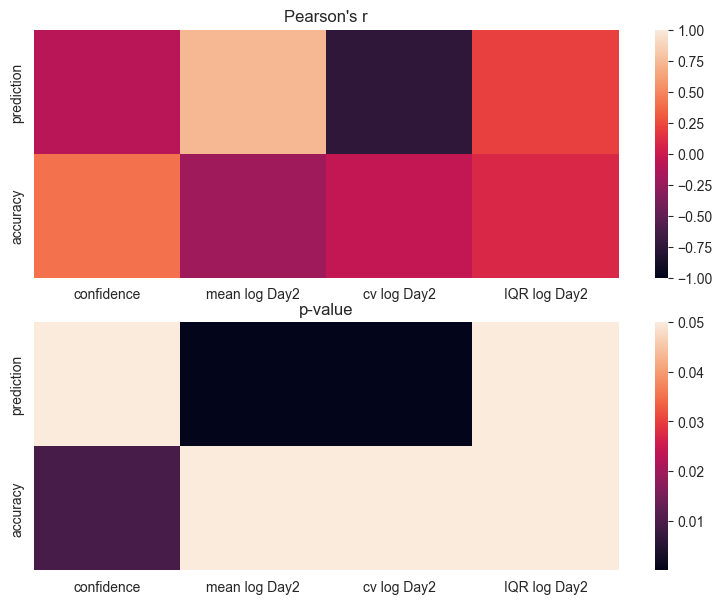

In [80]:
cor_predonly, corrected_pvalues_predonly_df=cut_corrected(cormat,pvalues,0,2,2,9)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.tight_layout()
plt.subplot(2, 1, 1)
sns.heatmap(cor_predonly,vmax=1,vmin=-1)
plt.title("Pearson's r")
plt.subplot(2, 1, 2)
sns.heatmap(corrected_pvalues_predonly_df, vmax=0.05)
plt.title("p-value")
plt.show()

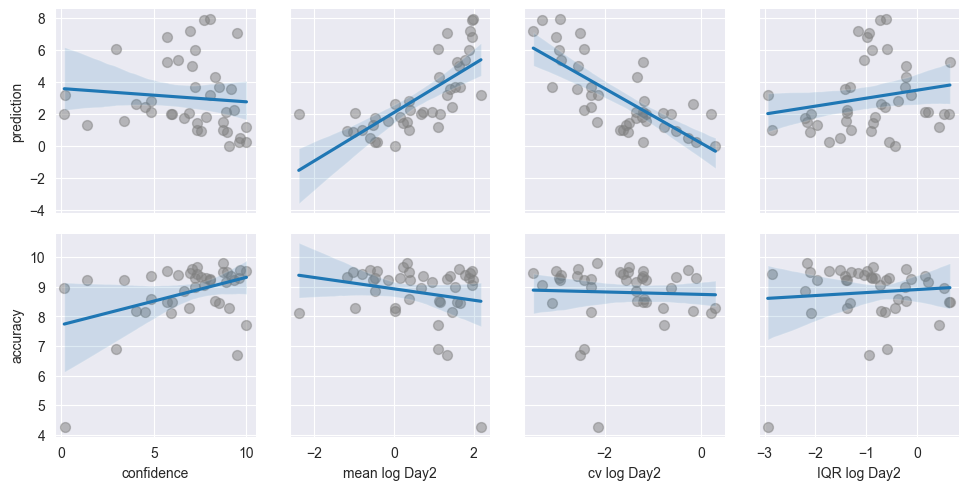

In [81]:
sns.set_style('darkgrid')
g = sns.PairGrid(Prediction_ratingonly, diag_sharey=False,  
                 x_vars=['confidence', 'mean log Day2', 'cv log Day2', 'IQR log Day2'],
                 y_vars=['prediction','accuracy'])
g.map_diag(sns.kdeplot, fill=True) 
g.map_offdiag(sns.regplot,scatter_kws={'s':50,'alpha':0.5,'color':'gray'})
# g.axes[0,0].set_xlim((-0.5,8))
# g.axes[0,1].set_xlim((-0.2,1.5))
# g.axes[0,2].set_xlim((-0.5,2.5))
# g.axes[0,3].set_xlim((-0.5,2))
# g.axes[0,4].set_xlim((0,55))
# g.axes[0,5].set_xlim((0,8))
# g.axes[0,6].set_xlim((-0.5,50))

# g.axes[0,0].set_ylim((-0.5,8))
# g.axes[1,0].set_ylim((-0.2,1.5))
# g.axes[2,0].set_ylim((-0.5,2.5))
# g.axes[3,0].set_ylim((-0.5,2))
# g.axes[4,0].set_ylim((0,55))
# g.axes[5,0].set_ylim((0,8))
# g.axes[6,0].set_ylim((-0.5,50))
plt.show()

# Third question: HMM with variability, prediction and confidence

In [82]:
participant_hmm_vari_pred_list=[]
print(len(participant_list))
for part in participant_list:
    found_4=False
    for index,row in df_hmm.iterrows():
        if row.PID==part.PID:
            if np.isnan(row['nstate_D2'])==False:
                nstate_D1=row['nstate_D1']
                hmmscore_D1=row['score_D1']
                nstate_D2=row['nstate_D2']
                hmmscore_D2=row['score_D2']
                found_4=True
                break
    if found_4==False:
        print(part.PID+" Not Found (HMM)")
    else:
        part_clinical=pain_rating_pred_hmm(part.PID)
        part_clinical.update(part,nstate1=nstate_D1,hmmscore1=hmmscore_D1,\
                                nstate2=nstate_D2,hmmscore2=hmmscore_D2)
        participant_hmm_vari_pred_list.append(part_clinical)

41


In [175]:
mean1_list_h=[];std1_list_h=[];cv1_list_h=[];IQR1_list_h=[];fano1_list_h=[]
mean2_list_h=[];std2_list_h=[];cv2_list_h=[];IQR2_list_h=[];fano2_list_h=[]
prediction_list_h=[];confidence_list_h=[];acc_list_h=[]
nstate_D1_list_h=[];hmmscore_D1_list_h=[]
nstate_D2_list_h=[];hmmscore_D2_list_h=[]
for part in participant_hmm_vari_pred_list:
    if part.check_isnan():
        continue
    mean1_list_h.append(part.mean1)
    std1_list_h.append(part.std1)
    cv1_list_h.append(part.cv1)
    IQR1_list_h.append(part.IQR1)
    fano1_list_h.append(part.fano1)
    mean2_list_h.append(part.mean2)
    std2_list_h.append(part.std2)
    cv2_list_h.append(part.cv2)
    IQR2_list_h.append(part.IQR2)
    fano2_list_h.append(part.fano2)

    prediction_list_h.append(part.prediction)
    confidence_list_h.append(part.confidence)
    acc_list_h.append(part.acc)

    nstate_D1_list_h.append(part.nstate_D1)
    hmmscore_D1_list_h.append(part.hmmscore_D1)
    nstate_D2_list_h.append(part.nstate_D2)
    hmmscore_D2_list_h.append(part.hmmscore_D2)
hmm_varipred_df=pd.DataFrame({
    # 'mean Day1':mean1_list,
    # 'std Day1':std1_list,
    # 'cv Day1':cv1_list,
    # 'IQR Day1':IQR1_list,
    # 'fano factor Day1':fano1_list,
    # 'mean Day2':mean2_list,
    # 'std Day2':std2_list,
    # 'cv Day2':cv2_list,
    # 'IQR Day2':IQR2_list,
    # 'fano factor Day2':fano2_list,

    # 'prediction':prediction_list,
    'confidence':confidence_list,
    'accuracy':acc_list,

    'nstate_D1':nstate_D1_list,
    'hmmscore_D1':hmmscore_D1_list,
    # 'nstate_D2':nstate_D2_list,
    # 'hmmscore_D2':hmmscore_D2_list
    })
cormat = hmm_varipred_df.corr()
pvalues = hmm_varipred_df.corr(method=lambda x, y: pearsonr(x, y)[1])

            nstate_D1  hmmscore_D1
confidence  -0.472179    -0.500394
accuracy    -0.148758    -0.367622
            nstate_D1  hmmscore_D1
confidence    0.00553     0.003021
accuracy      1.00000     0.035315


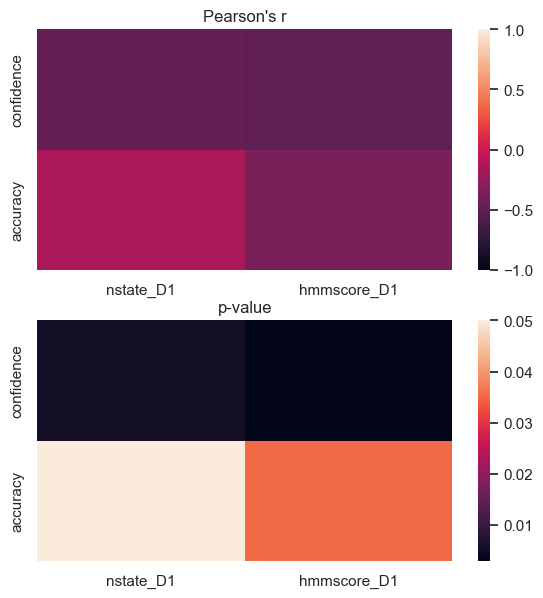

In [176]:
cor_hmm_varipred=cormat.iloc[0:2,2:]
pvalues_hmm_varipred=pvalues.iloc[0:2,2:]
corrected_pvalues_hmm_varipred=p_value_correction_rectangle_fdr(pvalues_hmm_varipred.to_numpy(),0.05)
corrected_pvalues_hmm_varipred_df = pd.DataFrame(data = corrected_pvalues_hmm_varipred,\
    index = pvalues_hmm_varipred.index,\
        columns = pvalues_hmm_varipred.columns)
print(cor_hmm_varipred)
print(corrected_pvalues_hmm_varipred_df)
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()
plt.subplot(2, 1, 1)
sns.heatmap(cor_hmm_varipred,vmax=1,vmin=-1)
plt.title("Pearson's r")
plt.subplot(2, 1, 2)
sns.heatmap(corrected_pvalues_hmm_varipred_df, vmax=0.05)
plt.title("p-value")
plt.show()

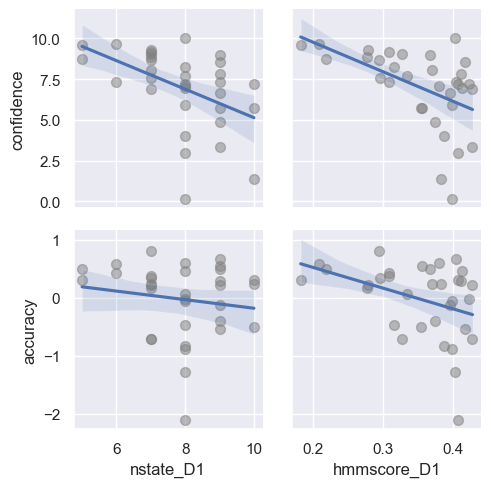

In [177]:
sns.set_style('darkgrid')
g = sns.PairGrid(hmm_varipred_df, diag_sharey=False,  
                 x_vars=['nstate_D1', 'hmmscore_D1'],
                 y_vars=['confidence','accuracy'])
g.map_diag(sns.kdeplot, fill=True) 
g.map_offdiag(sns.regplot,scatter_kws={'s':50,'alpha':0.5,'color':'gray'})
# g.axes[0,0].set_xlim((-0.5,8))
# g.axes[0,1].set_xlim((-0.2,1.5))
# g.axes[0,2].set_xlim((-0.5,2.5))
# g.axes[0,3].set_xlim((-0.5,2))
# g.axes[0,4].set_xlim((0,55))
# g.axes[0,5].set_xlim((0,8))
# g.axes[0,6].set_xlim((-0.5,50))

# g.axes[0,0].set_ylim((-0.5,8))
# g.axes[1,0].set_ylim((-0.2,1.5))
# g.axes[2,0].set_ylim((-0.5,2.5))
# g.axes[3,0].set_ylim((-0.5,2))
# g.axes[4,0].set_ylim((0,55))
# g.axes[5,0].set_ylim((0,8))
# g.axes[6,0].set_ylim((-0.5,50))
plt.show()